In [ ]:
!git clone https://github.com/harveyslash/Facial-Similarity-with-Siamese-Networks-in-Pytorch.git
!mkdir data
!mv Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/testing/* data/
!mv Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/training/* data/

!apt install -y libboost-all-dev
!pip install -U pip
!pip install "pybind11[global]"

!pip install aijack

Cloning into 'Facial-Similarity-with-Siamese-Networks-in-Pytorch'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 550 (delta 6), reused 18 (delta 6), pack-reused 532
Receiving objects: 100% (550/550), 6.32 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-all-dev is already the newest version (1.71.0.0ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling

In [ ]:
import cv2
import copy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from numpy import e
from matplotlib import pyplot as plt
import torch.optim as optim
from tqdm.notebook import tqdm

from aijack.collaborative.fedavg import FedAVGAPI, FedAVGClient, FedAVGServer
from aijack.attack.inversion import GradientInversionAttackServerManager
from torch.utils.data import DataLoader, TensorDataset
from aijack.utils import NumpyDataset

import warnings
import numpy as np
warnings.filterwarnings("ignore")

BASE = "data/"
path = "/content/drive/MyDrive/SLPwoapprox_Results/"

In [ ]:
imgs = []
labels = []
for i in range(1, 41):
    for j in range(1, 8):
        img = cv2.imread(BASE + f"s{i}/{j}.pgm", 0)
        imgs.append(img)
        labels.append(i - 1)

X = np.stack(imgs)
y = np.array(labels)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
trainset = NumpyDataset(X, y, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)


del X
del y


for i in range(1, 41):
    for j in range(8,11):
        img = cv2.imread(BASE + f"s{i}/{j}.pgm", 0)
        imgs.append(img)
        labels.append(i - 1)

X = np.stack(imgs)
y = np.array(labels)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
testset = NumpyDataset(X, y, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=True, num_workers=2
)

In [ ]:
# simply define a relu approx function
def relu(input):
    return 0.563059 + 0.5*input + 0.078047*input*input#0.119782 + 0.5*out + 0.147298*out*out-0.002015*out*out*out*out

# create a class wrapper from PyTorch nn.Module, so
# the function now can be easily used in models
class ReLu(nn.Module):
    def __init__(self):
        super().__init__() # init the base class

    def forward(self, input):
        return relu(input) # simply apply already implemented relu

# initialize activation function
activation_function = ReLu()

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fla = nn.Flatten()
        self.fc = nn.Linear(112 * 92, 100)
        self.fc2 = nn.Linear(100,40)

    def forward(self, x):
        x = self.fla(x)
        x = self.fc(x)
        x = relu(x)
        x = self.fc2(x)
        return x

#DLG Attack


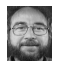

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else "cpu"
for data in trainloader:
    xs, ys = data[0], data[1]
    break

x = xs[:1]
y = ys[:1]

fig = plt.figure(figsize=(1, 1))
plt.axis("off")
plt.imshow(x.detach().numpy()[0][0], cmap="gray")
plt.show()

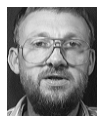

communication 0, epoch 0: client-1 3.684354782104492
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=77: loss did not improve in the last 50 rounds.


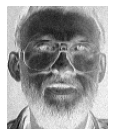

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

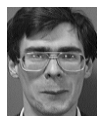

communication 0, epoch 0: client-1 3.607725143432617
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=86: loss did not improve in the last 50 rounds.
iter=68: loss did not improve in the last 50 rounds.


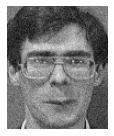

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

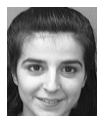

communication 0, epoch 0: client-1 3.7048025131225586
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=53: loss did not improve in the last 50 rounds.
iter=99: loss did not improve in the last 50 rounds.


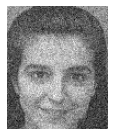

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

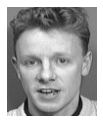

communication 0, epoch 0: client-1 3.7137327194213867
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=72: loss did not improve in the last 50 rounds.
iter=72: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=57: loss did not improve in the last 50 rounds.


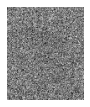

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

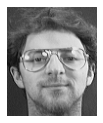

communication 0, epoch 0: client-1 3.4906342029571533
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=63: loss did not improve in the last 50 rounds.
iter=80: loss did not improve in the last 50 rounds.


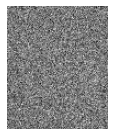

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

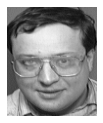

communication 0, epoch 0: client-1 3.2873291969299316
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=54: loss did not improve in the last 50 rounds.
iter=89: loss did not improve in the last 50 rounds.


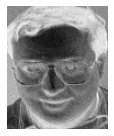

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

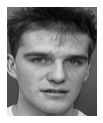

communication 0, epoch 0: client-1 3.891753911972046
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=78: loss did not improve in the last 50 rounds.


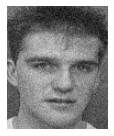

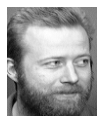

communication 0, epoch 0: client-1 3.952425956726074
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=90: loss did not improve in the last 50 rounds.
iter=53: loss did not improve in the last 50 rounds.


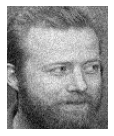

<Figure size 432x288 with 0 Axes>

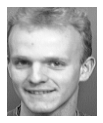

communication 0, epoch 0: client-1 3.461245059967041
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=81: loss did not improve in the last 50 rounds.


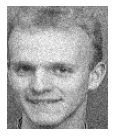

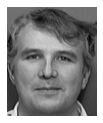

communication 0, epoch 0: client-1 3.835075855255127
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0
iter=68: loss did not improve in the last 50 rounds.
iter=72: loss did not improve in the last 50 rounds.


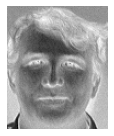

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
criterion = nn.CrossEntropyLoss()
i=0
for data in testloader:
  if i==10:
    break
  xs, ys = data[0], data[1]
  x = xs[:1]
  y = ys[:1]
  name= "/content/drive/MyDrive/DLG/"+"original"+str(i)+".png"
  fig = plt.figure(figsize=(5, 2))
  plt.axis("off")
  plt.imshow(x.detach().numpy()[0][0], cmap="gray")
  plt.savefig(name)
  plt.show()

  manager = GradientInversionAttackServerManager(
  (1, 112, 92),#Input shape
  num_trial_per_communication=5,
  log_interval=0,
  num_iteration=100,
  distancename="l2",
  device=device,
  gradinvattack_kwargs={"lr": 1.0},
  )
  DLGFedAVGServer = manager.attach(FedAVGServer)

  client = FedAVGClient(
  MLP().to(device),
  lr=1.0,
  device=device,
  )
  server = DLGFedAVGServer(
  [client],
  MLP().to(device),
  lr=1.0,
  device=device,
  )


  local_dataloaders = [DataLoader(TensorDataset(x,y))]
  local_optimizers = [optim.SGD(client.parameters(), lr=1.0)]

  api = FedAVGAPI(
  server,
  [client],
  criterion,
  local_optimizers,
  local_dataloaders,
  num_communication=1,
  local_epoch=5,
  use_gradients=True,
  device=device,
  )

  api.run()

  fig = plt.figure(figsize=(5, 2))
  j = 0
  for s, result in enumerate(server.attack_results[0]):
    ax = fig.add_subplot(1, len(server.attack_results[0]), s + 1)
    ax.imshow(result[0].cpu().detach().numpy()[0][0], cmap="gray")
    ax.axis("off")
    plt.tight_layout()
    name= "/content/drive/MyDrive/DLG/"+"extracted"+str(i)+str(j)+".png"
    plt.savefig(name)
    plt.show()
    j+=1
  i+=1

communication 0, epoch 0: client-1 3.6332571506500244
communication 0, epoch 1: client-1 0.0
communication 0, epoch 2: client-1 0.0
communication 0, epoch 3: client-1 0.0
communication 0, epoch 4: client-1 0.0


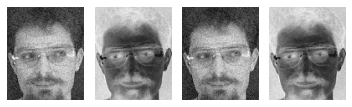

In [ ]:
criterion = nn.CrossEntropyLoss()
manager = GradientInversionAttackServerManager(
    (1, 112, 92),#Input shape
    num_trial_per_communication=5,
    log_interval=0,
    num_iteration=100,
    distancename="l2",
    device=device,
    gradinvattack_kwargs={"lr": 1.0},
)
DLGFedAVGServer = manager.attach(FedAVGServer)

client = FedAVGClient(
    MLP().to(device),
    lr=1.0,
    device=device,
)
server = DLGFedAVGServer(
    [client],
    MLP().to(device),
    lr=1.0,
    device=device,
)


local_dataloaders = [DataLoader(TensorDataset(x,y))]
local_optimizers = [optim.SGD(client.parameters(), lr=1.0)]

api = FedAVGAPI(
server,
[client],
criterion,
local_optimizers,
local_dataloaders,
num_communication=1,
local_epoch=5,
use_gradients=True,
device=device,
)

api.run()

fig = plt.figure(figsize=(5, 2))
for s, result in enumerate(server.attack_results[0]):
    ax = fig.add_subplot(1, len(server.attack_results[0]), s + 1)
    ax.imshow(result[0].cpu().detach().numpy()[0][0], cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

#Trying defense


In [ ]:
from aijack.defense import GeneralMomentAccountant, DPSGDManager
lot_size = 40
batch_size = 1
iterations = 20
sigma = 0.5
l2_norm_clip = 1
delta = 1e-5

accountant = GeneralMomentAccountant(
    noise_type="Gaussian",
    search="ternary",
    precision=0.001,
    order_max=1,
    order_min=72,
    max_iterations=1000,
    bound_type="rdp_upperbound_closedformula",
    backend="python",
)

privacy_manager = DPSGDManager(
    accountant,
    optim.SGD,
    l2_norm_clip=l2_norm_clip,
    dataset=trainset,
    lot_size=lot_size,
    batch_size=batch_size,
    iterations=iterations,
)
accountant.reset_step_info()
accountant.add_step_info(
    {"sigma": sigma},
    lot_size / len(trainset),
    iterations * (len(trainset) / lot_size),
)
estimated_epsilon = accountant.get_epsilon(delta=delta)
print(f"estimated epsilon is {estimated_epsilon}")

accountant.reset_step_info()
dpoptimizer_cls, lot_loader, batch_loader = privacy_manager.privatize(
    noise_multiplier=sigma
)

estimated epsilon is 56.384900436393984


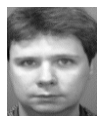

communication 0, epoch 0: client-1 4.074710845947266
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


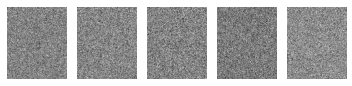

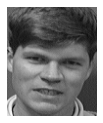

communication 0, epoch 0: client-1 3.5398759841918945
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


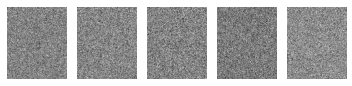

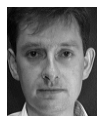

communication 0, epoch 0: client-1 3.6933624744415283
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


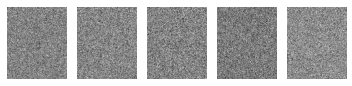

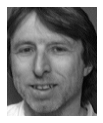

communication 0, epoch 0: client-1 3.639616012573242
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


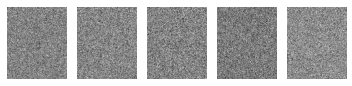

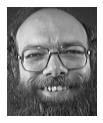

communication 0, epoch 0: client-1 3.7222628593444824
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


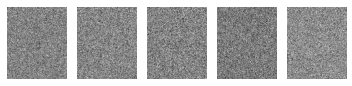

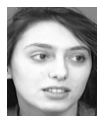

communication 0, epoch 0: client-1 3.850163698196411
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


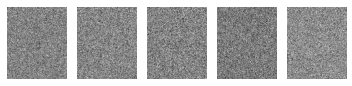

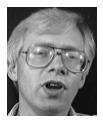

communication 0, epoch 0: client-1 3.6017911434173584
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


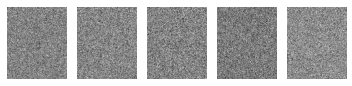

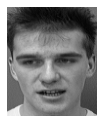

communication 0, epoch 0: client-1 3.836019992828369
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


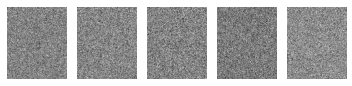

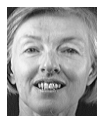

communication 0, epoch 0: client-1 3.386504888534546
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


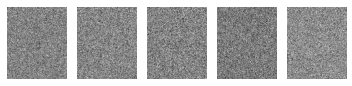

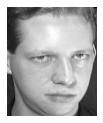

communication 0, epoch 0: client-1 4.103074073791504
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


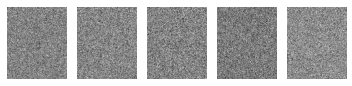

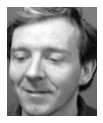

communication 0, epoch 0: client-1 4.046164512634277
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


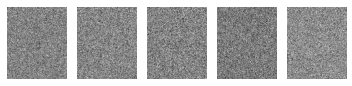

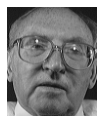

communication 0, epoch 0: client-1 4.071023941040039
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


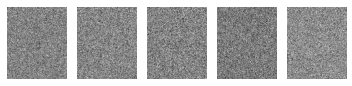

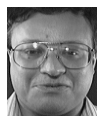

communication 0, epoch 0: client-1 4.135934829711914
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


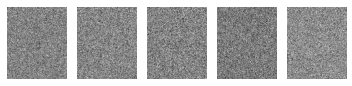

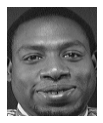

communication 0, epoch 0: client-1 3.3529319763183594
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


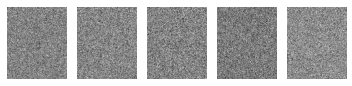

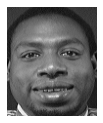

communication 0, epoch 0: client-1 3.354653835296631
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


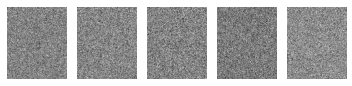

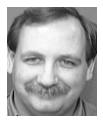

communication 0, epoch 0: client-1 4.373517990112305
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


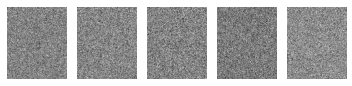

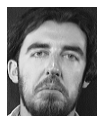

communication 0, epoch 0: client-1 4.080141067504883
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


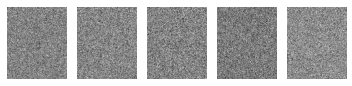

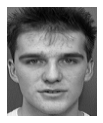

communication 0, epoch 0: client-1 3.823270082473755
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


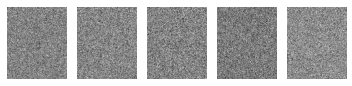

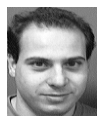

communication 0, epoch 0: client-1 3.423387289047241
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


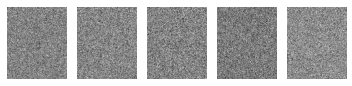

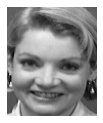

communication 0, epoch 0: client-1 4.041825771331787
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


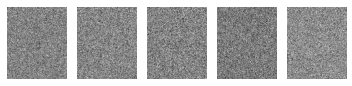

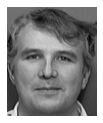

communication 0, epoch 0: client-1 3.8056466579437256
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


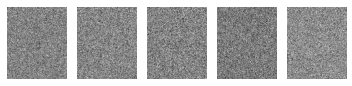

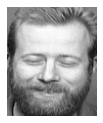

communication 0, epoch 0: client-1 3.9358584880828857
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


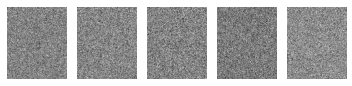

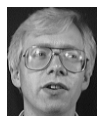

communication 0, epoch 0: client-1 3.579954147338867
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


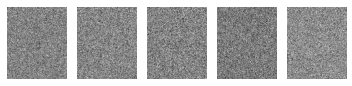

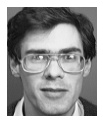

communication 0, epoch 0: client-1 3.485462188720703
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


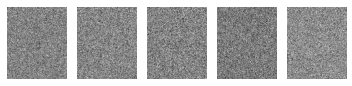

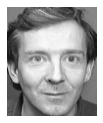

communication 0, epoch 0: client-1 3.993698835372925
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


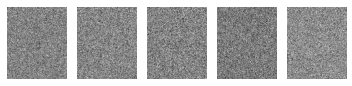

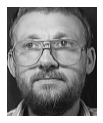

communication 0, epoch 0: client-1 3.6967062950134277
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


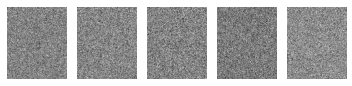

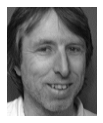

communication 0, epoch 0: client-1 3.6143507957458496
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


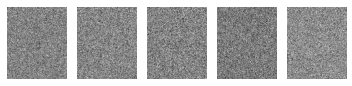

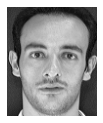

communication 0, epoch 0: client-1 3.7538788318634033
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


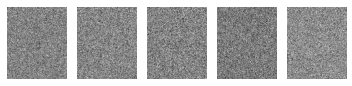

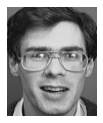

communication 0, epoch 0: client-1 3.558600902557373
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


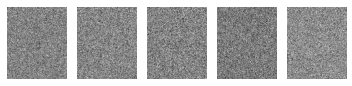

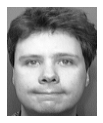

communication 0, epoch 0: client-1 4.014005661010742
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


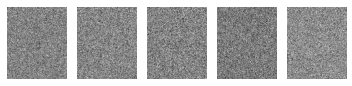

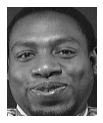

communication 0, epoch 0: client-1 3.387131452560425
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


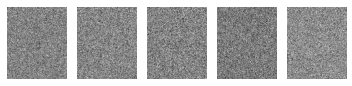

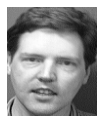

communication 0, epoch 0: client-1 3.471381425857544
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


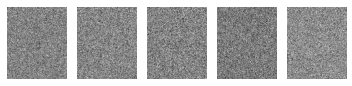

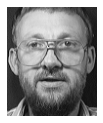

communication 0, epoch 0: client-1 3.647907018661499
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


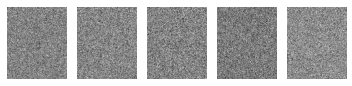

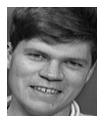

communication 0, epoch 0: client-1 3.5857083797454834
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


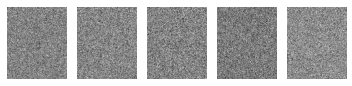

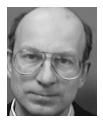

communication 0, epoch 0: client-1 3.28183913230896
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


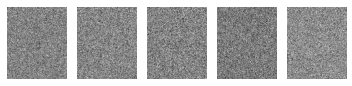

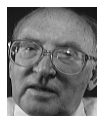

communication 0, epoch 0: client-1 4.003057479858398
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


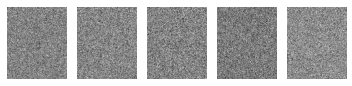

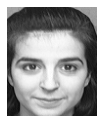

communication 0, epoch 0: client-1 3.7824273109436035
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


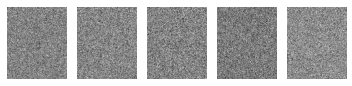

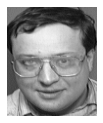

communication 0, epoch 0: client-1 4.184635162353516
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


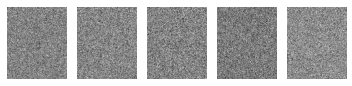

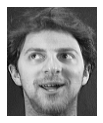

communication 0, epoch 0: client-1 4.080891132354736
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


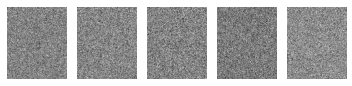

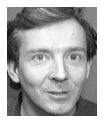

communication 0, epoch 0: client-1 4.000232696533203
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


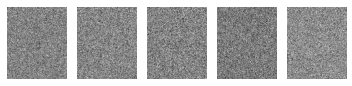

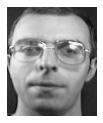

communication 0, epoch 0: client-1 3.6489429473876953
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


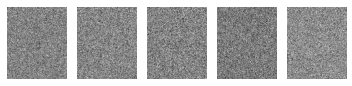

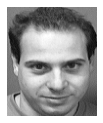

communication 0, epoch 0: client-1 3.454418659210205
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


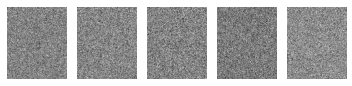

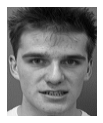

communication 0, epoch 0: client-1 3.822876453399658
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


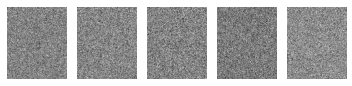

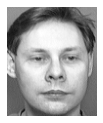

communication 0, epoch 0: client-1 3.2934134006500244
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


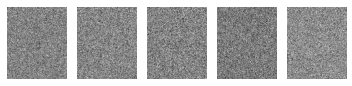

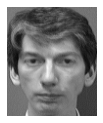

communication 0, epoch 0: client-1 3.300154447555542
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


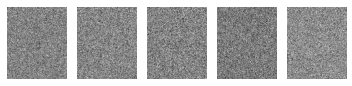

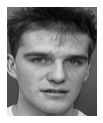

communication 0, epoch 0: client-1 3.8232765197753906
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


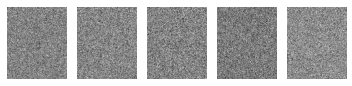

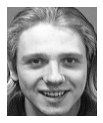

communication 0, epoch 0: client-1 3.8622846603393555
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


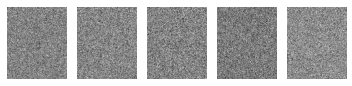

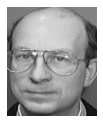

communication 0, epoch 0: client-1 3.258028984069824
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


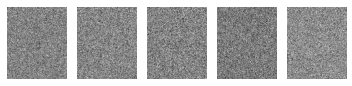

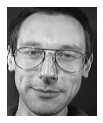

communication 0, epoch 0: client-1 3.2936294078826904
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


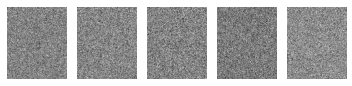

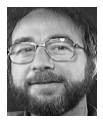

communication 0, epoch 0: client-1 3.708333969116211
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


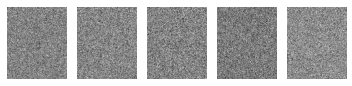

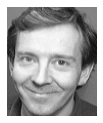

communication 0, epoch 0: client-1 3.9737682342529297
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


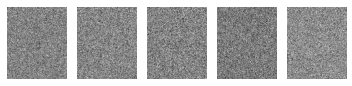

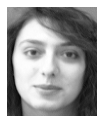

communication 0, epoch 0: client-1 3.891690731048584
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


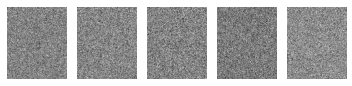

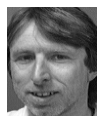

communication 0, epoch 0: client-1 3.638242721557617
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


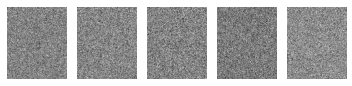

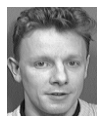

communication 0, epoch 0: client-1 3.580094814300537
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


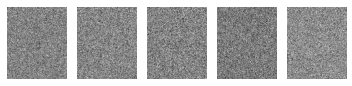

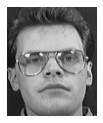

communication 0, epoch 0: client-1 3.6723341941833496
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


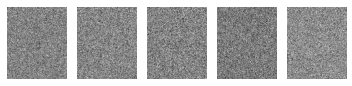

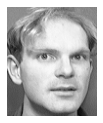

communication 0, epoch 0: client-1 3.818197250366211
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


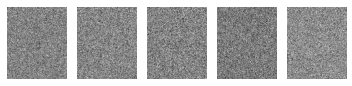

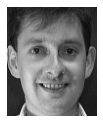

communication 0, epoch 0: client-1 3.5915215015411377
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


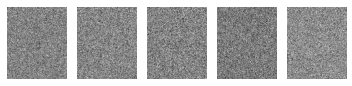

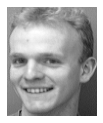

communication 0, epoch 0: client-1 4.039073944091797
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


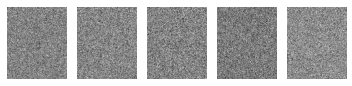

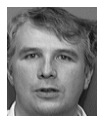

communication 0, epoch 0: client-1 3.8205337524414062
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


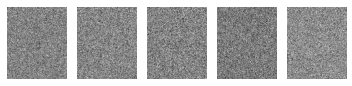

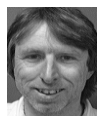

communication 0, epoch 0: client-1 3.6311843395233154
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


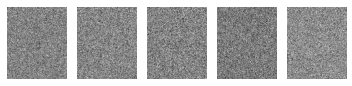

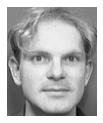

communication 0, epoch 0: client-1 3.8091185092926025
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


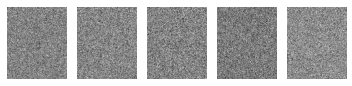

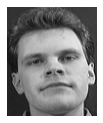

communication 0, epoch 0: client-1 3.6386494636535645
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


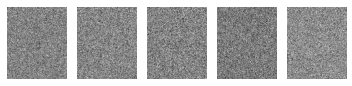

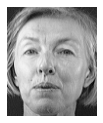

communication 0, epoch 0: client-1 3.473982095718384
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


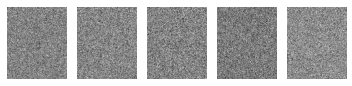

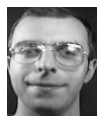

communication 0, epoch 0: client-1 3.6315484046936035
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


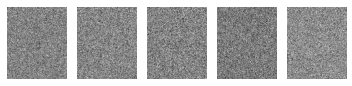

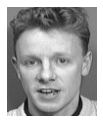

communication 0, epoch 0: client-1 3.5192251205444336
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


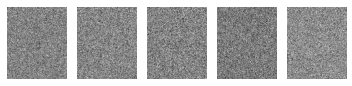

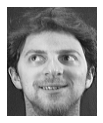

communication 0, epoch 0: client-1 4.034125328063965
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


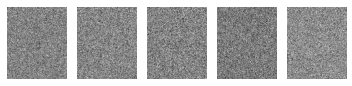

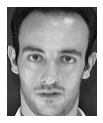

communication 0, epoch 0: client-1 3.7290070056915283
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


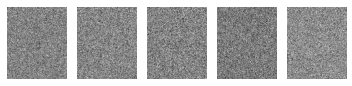

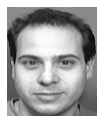

communication 0, epoch 0: client-1 3.3750743865966797
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


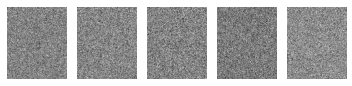

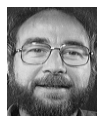

communication 0, epoch 0: client-1 3.657468795776367
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


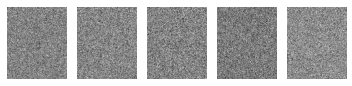

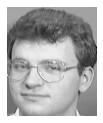

communication 0, epoch 0: client-1 3.860206127166748
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


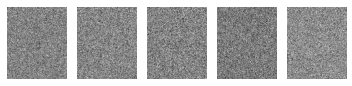

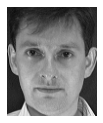

communication 0, epoch 0: client-1 3.583359718322754
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


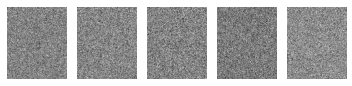

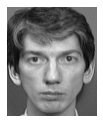

communication 0, epoch 0: client-1 3.2557504177093506
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


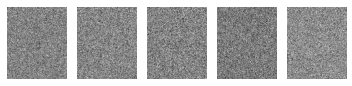

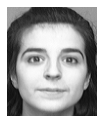

communication 0, epoch 0: client-1 3.7444815635681152
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


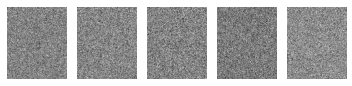

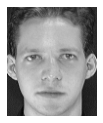

communication 0, epoch 0: client-1 4.004193305969238
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


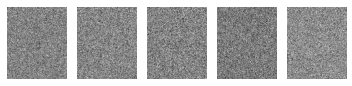

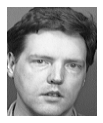

communication 0, epoch 0: client-1 3.5094406604766846
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


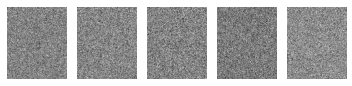

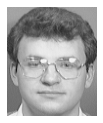

communication 0, epoch 0: client-1 3.871222734451294
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


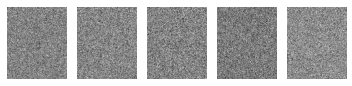

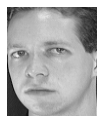

communication 0, epoch 0: client-1 4.085660934448242
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


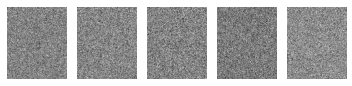

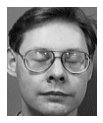

communication 0, epoch 0: client-1 3.289482355117798
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


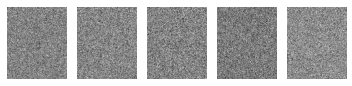

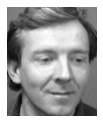

communication 0, epoch 0: client-1 3.9467272758483887
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


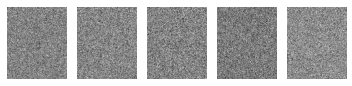

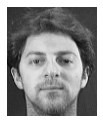

communication 0, epoch 0: client-1 4.103014945983887
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


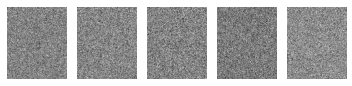

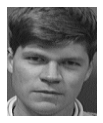

communication 0, epoch 0: client-1 3.5305702686309814
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


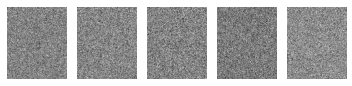

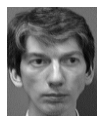

communication 0, epoch 0: client-1 3.2962732315063477
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


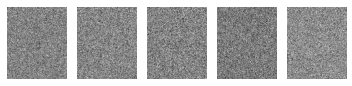

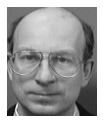

communication 0, epoch 0: client-1 3.284003496170044
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


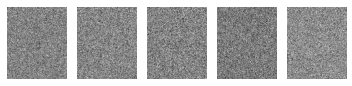

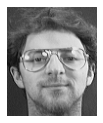

communication 0, epoch 0: client-1 4.073128700256348
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


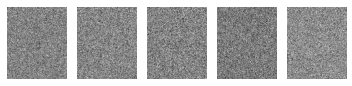

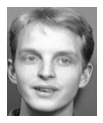

communication 0, epoch 0: client-1 3.5720174312591553
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


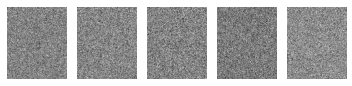

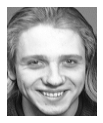

communication 0, epoch 0: client-1 3.821397066116333
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


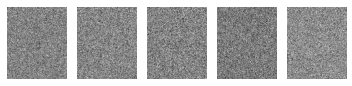

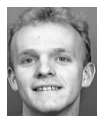

communication 0, epoch 0: client-1 3.9826714992523193
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


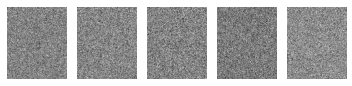

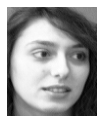

communication 0, epoch 0: client-1 3.87839937210083
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


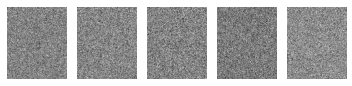

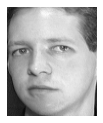

communication 0, epoch 0: client-1 4.06957483291626
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


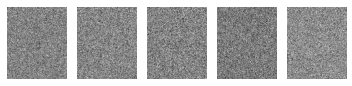

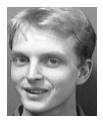

communication 0, epoch 0: client-1 3.5552561283111572
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


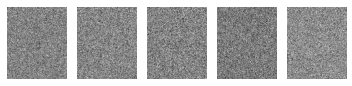

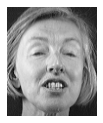

communication 0, epoch 0: client-1 3.4167861938476562
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


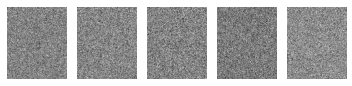

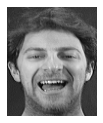

communication 0, epoch 0: client-1 4.011402606964111
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


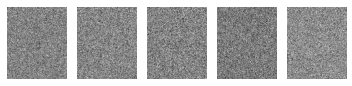

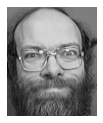

communication 0, epoch 0: client-1 3.5833234786987305
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


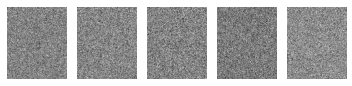

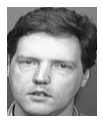

communication 0, epoch 0: client-1 3.479909896850586
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


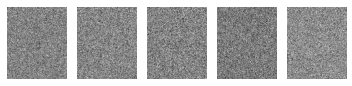

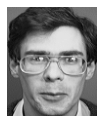

communication 0, epoch 0: client-1 3.543835401535034
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


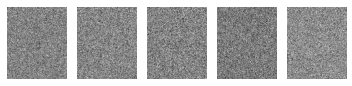

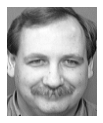

communication 0, epoch 0: client-1 4.33290958404541
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


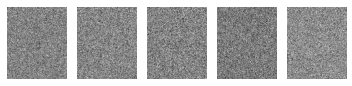

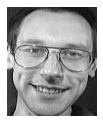

communication 0, epoch 0: client-1 3.2066497802734375
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


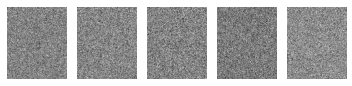

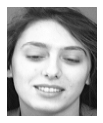

communication 0, epoch 0: client-1 3.8881609439849854
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


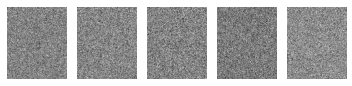

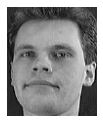

communication 0, epoch 0: client-1 3.7006583213806152
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


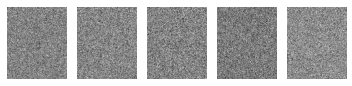

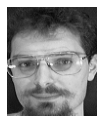

communication 0, epoch 0: client-1 3.9479169845581055
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


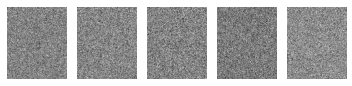

In [ ]:
net = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = dpoptimizer_cls(net.parameters(), lr=0.05, momentum=0.9)

i=0
for data in testloader:
  if i==10:
    break
  xs, ys = data[0], data[1]
  x = xs[:1]
  y = ys[:1]
  name= "/content/drive/MyDrive/DLG/"+"original"+str(i)+".png"
  fig = plt.figure(figsize=(5, 2))
  plt.axis("off")
  plt.imshow(x.detach().numpy()[0][0], cmap="gray")
  plt.savefig(name)
  plt.show()


  manager = GradientInversionAttackServerManager(
      (1, 112, 92),
      num_trial_per_communication=5,
      log_interval=0,
      num_iteration=100,
      distancename="l2",
      device=device,
      gradinvattack_kwargs={"lr": 1.0},
  )
  DLGFedAVGServer = manager.attach(FedAVGServer)

  client = FedAVGClient(
      net.to(device),
      lr=1.0,
      device=device,
  )
  server = DLGFedAVGServer(
      [client],
      net.to(device),
      lr=1.0,
      device=device,
  )

  local_dataloaders = [DataLoader(TensorDataset(x, y))]
  local_optimizers = [dpoptimizer_cls(net.parameters(), lr=0.05, momentum=0.9)]

  api = FedAVGAPI(
      server,
      [client],
      criterion,
      local_optimizers,
      local_dataloaders,
      num_communication=1,
      local_epoch=1,
      use_gradients=True,
      device=device,
  )

  api.run()
  j=0
  fig = plt.figure(figsize=(5, 2))
  for s, result in enumerate(server.attack_results[0]):
      ax = fig.add_subplot(1, len(server.attack_results[0]), s + 1)
      ax.imshow(result[0].cpu().detach().numpy()[0][0], cmap="gray")
      ax.axis("off")
  plt.tight_layout()
  name= "/content/drive/MyDrive/DLG/DPSGD"+"extracted"+str(i)+str(j)+".png"
  plt.savefig(name)
  plt.show()